In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import pytorch_lightning as pl

from func2graph import data, models, tools, baselines

torch.Size([10, 30000])


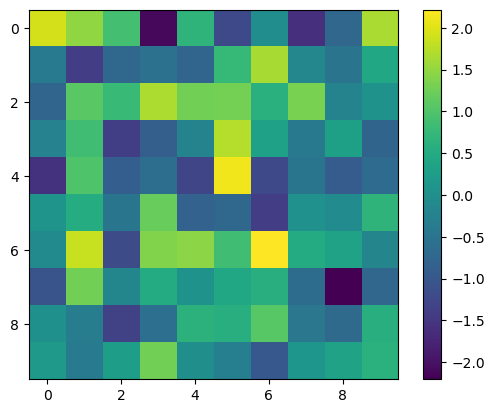

In [29]:
neuron_num = 10
dt = 0.001
tau = 0.3

spike_neuron_num = 2
spike_input = 5

weight_scale = 1
init_scale = 1

total_time = 30000
data_random_seed = 42

weight_type = "random"

train_data_size = 20000
window_size = 200
batch_size = 32

trainloader, validloader, weight_matrix = data.generate_simulation_data(
    neuron_num=neuron_num,
    dt=dt,
    tau=tau,
    spike_neuron_num=spike_neuron_num,
    spike_input=spike_input,
    weight_scale=weight_scale,
    init_scale=init_scale,
    total_time=total_time,
    data_random_seed=data_random_seed,
    weight_type=weight_type,
    train_data_size=train_data_size,
    window_size=window_size,
    batch_size=batch_size,
    task_type="prediction",     #############
    predict_window_size=1,    ############
)

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

In [32]:
hidden_size_1=128
h_layers_1=2
heads=1
attention_layers=1
hidden_size_2=64
h_layers_2=2

pos_enc_type="lookup_table"   # "none", "sin_cos", "lookup_table"

predict_mode_model = models.Attention_Autoencoder(
    neuron_num=neuron_num,
    window_size=window_size,
    hidden_size_1=hidden_size_1,
    h_layers_1=h_layers_1,
    heads=heads,
    attention_layers=attention_layers,
    hidden_size_2=hidden_size_2,
    h_layers_2=h_layers_2,
    prediction_mode=True,     ########################
    pos_enc_type=pos_enc_type,   ########################
    task_type = "prediction",    # "reconstruction" or "prediction"
    predict_window_size = 1,
)

baseline_model = baselines.Baseline_2(neuron_num=neuron_num)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A4000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at ../../output/8_31_random_weight/Attention_Autoencoder_10_0.001_0.3_2_5_1.0_1.0_30000_42_random_20000_200_prediction_1_42_128_2_1_1_64_2_5e-05_lookup_table/epoch=94-step=59375.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from the checkpoint at ../../output/8_31_rand

Predicting DataLoader 0:   0%|          | 0/625 [00:00<?, ?it/s]1
2
3
Predicting DataLoader 0:   0%|          | 1/625 [00:00<00:02, 215.69it/s]1
2
3
Predicting DataLoader 0:   0%|          | 2/625 [00:00<00:02, 274.41it/s]1
2
3
Predicting DataLoader 0:   0%|          | 3/625 [00:00<00:02, 309.93it/s]1
2
3
Predicting DataLoader 0:   1%|          | 4/625 [00:00<00:01, 328.72it/s]1
2
3
Predicting DataLoader 0:   1%|          | 5/625 [00:00<00:01, 342.59it/s]1
2
3
Predicting DataLoader 0:   1%|          | 6/625 [00:00<00:01, 354.15it/s]1
2
3
Predicting DataLoader 0:   1%|          | 7/625 [00:00<00:01, 349.43it/s]1
2
3
Predicting DataLoader 0:   1%|▏         | 8/625 [00:00<00:01, 355.29it/s]1
2
3
Predicting DataLoader 0:   1%|▏         | 9/625 [00:00<00:01, 361.22it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 10/625 [00:00<00:01, 364.19it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 11/625 [00:00<00:01, 367.26it/s]1
2
3
Predicting DataLoader 0:   2%|▏         | 12/625 [00:00<00:

PREDICT Profiler Report

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                      	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                       	|  -              	|  8781           	|  4.2415         	

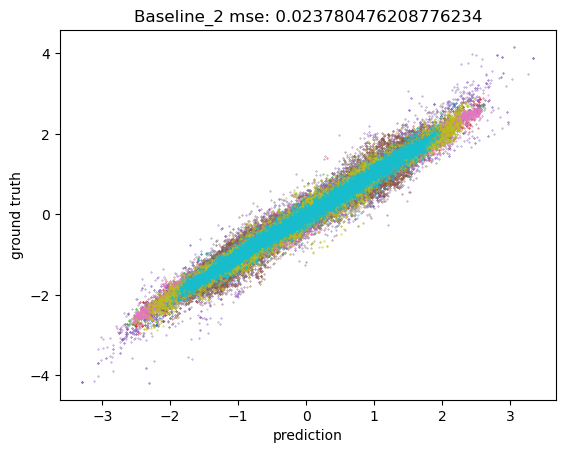

0.023780476208776234


In [34]:
# checkpoint_path = "../../output/8_30_baseline_2/Baseline_2_10_0.001_0.3_2_5_1.0_1.0_30000_42_random_20000_200_baseline_2_100_42_128_2_1_1_258_2_5e-05_none/epoch=199-step=150000.ckpt"
# predictions, ground_truths, avg_attention, attentions = tools.get_avg_attention(trainloader, predict_mode_model, checkpoint_path, neuron_num)

trainer = pl.Trainer(
    devices=[1],
    accelerator="gpu",
    benchmark=False,
    profiler="simple",
)
checkpoint_path = "../../output/8_31_random_weight/Attention_Autoencoder_10_0.001_0.3_2_5_1.0_1.0_30000_42_random_20000_200_prediction_1_42_128_2_1_1_64_2_5e-05_lookup_table/epoch=94-step=59375.ckpt"
# results = trainer.predict(predict_mode_model, dataloaders=[validloader], ckpt_path=checkpoint_path)
# results = torch.cat(results, dim=0).cpu().numpy()

predictions, ground_truths, avg_attention, attentions = tools.get_avg_attention(trainloader, predict_mode_model, checkpoint_path, neuron_num)

# plot
mse = 0
for i in range(neuron_num):
    plt.scatter(predictions[:,i,:], ground_truths[:,i,:], s=0.1)
    mse += np.mean((predictions[:,i,:] - ground_truths[:,i,:]) ** 2)
plt.xlabel("prediction")
plt.ylabel("ground truth")
plt.title("Baseline_2" + " mse: " + str(mse / neuron_num))
plt.show()
print(mse / neuron_num)


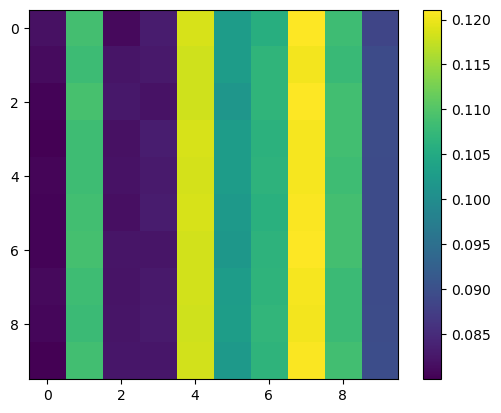

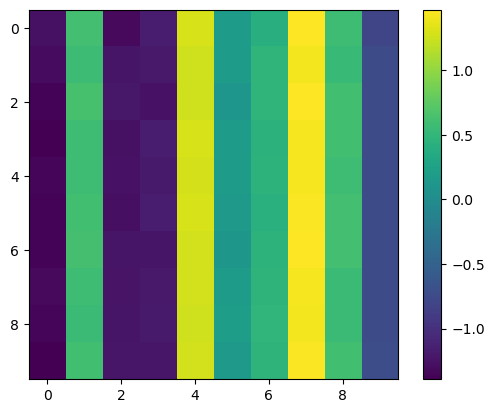

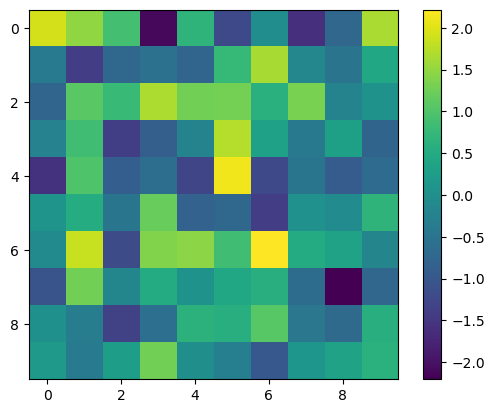

In [6]:
plt.imshow(avg_attention)
plt.colorbar()
plt.show()

# Normalize
mean = np.mean(avg_attention)
std = np.std(avg_attention)
normalized_avg_attention = (avg_attention - mean) / std

plt.imshow(normalized_avg_attention*weight_scale)
plt.colorbar()
plt.show()

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

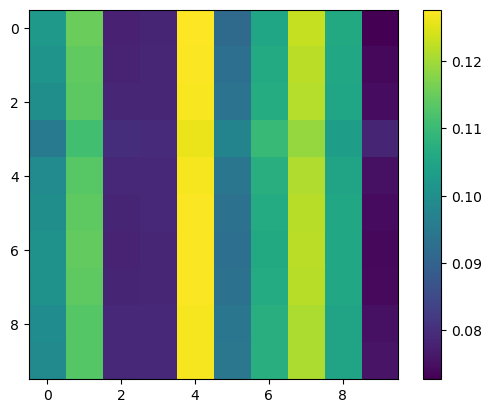

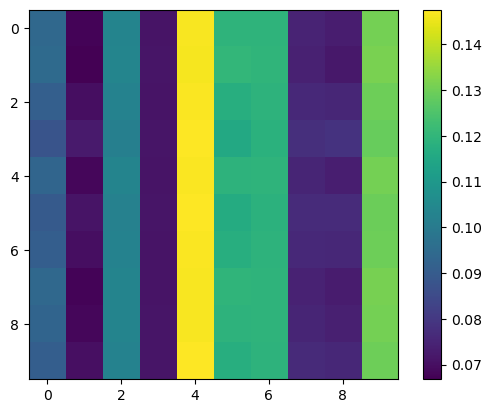

In [7]:
plt.imshow(attentions[0])
plt.colorbar()
plt.show()

plt.imshow(attentions[50])
plt.colorbar()
plt.show()

tensor(0.5879)


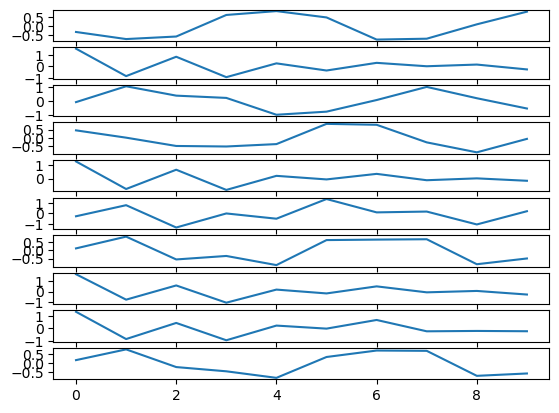

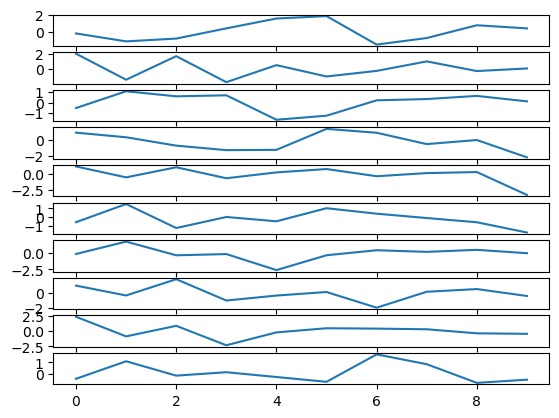

In [9]:
print(F.mse_loss(torch.from_numpy(predictions), torch.from_numpy(ground_truths), reduction="mean"))

for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(predictions[5][i])
plt.show()

for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(ground_truths[5][i])
plt.show()